In [2]:
library(tidyr)
library(dplyr)
library(corrplot)


lifeData_original <- read.csv("D:/Code/BIOSTAT682/Life Expectancy.csv")
dim(lifeData_original)

countries_to_drop = c("Equatorial Guinea", "Haiti")  # they only have predict data, no training data

lifeData_full <- lifeData_original %>% drop_na() %>% filter(!Country %in% countries_to_drop)

dim(lifeData_full)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded



[1] 2938   22

[1] 1646   22

In [28]:
write.csv(lifeData_full,"D:/Code/BIOSTAT682/Life Expectancy_v0.csv", row.names = FALSE)

In [31]:
columns_to_drop = c("percentage.expenditure", "infant.deaths", "under.five.deaths", "thinness.5.9.years.")
lifeData_col_dropped <- lifeData_full %>% select(-one_of(columns_to_drop))
write.csv(lifeData_col_dropped,"D:/Code/BIOSTAT682/Life Expectancy_v1.csv", row.names = FALSE)

In [58]:
lifeData_corrected <- lifeData_col_dropped
for(i in 2:(nrow(lifeData_corrected)-1)){
  if (lifeData_corrected[i,]$Country %in% c("Canada", "Greece")) {
      lifeData_corrected[i,]$Status = "Developed"
  }
  if (lifeData_corrected[i,]$Country == lifeData_corrected[i-1,]$Country) {
    for(j in 5:ncol(lifeData_corrected)) {
      if (80*lifeData_corrected[i,j] < lifeData_corrected[i-1,j]) {
        lifeData_corrected[i,j] = lifeData_corrected[i,j] * 100
      } 
      if (8*lifeData_corrected[i,j] < lifeData_corrected[i-1,j]) {
        lifeData_corrected[i,j] = lifeData_corrected[i,j] * 10
      }
    }
  }
  if (lifeData_corrected[i,]$Country == lifeData_corrected[i+1,]$Country) {
    for(j in 5:ncol(lifeData_corrected)) {
      if (80*lifeData_corrected[i,j] < lifeData_corrected[i+1,j]) {
        lifeData_corrected[i,j] = lifeData_corrected[i,j] * 100
      }
      if (8*lifeData_corrected[i,j] < lifeData_corrected[i+1,j]) {
        lifeData_corrected[i,j] = lifeData_corrected[i,j] * 10
      }
    }
  }
}

In [59]:
head(lifeData_corrected, 20)
write.csv(lifeData_corrected,"D:/Code/BIOSTAT682/Life Expectancy_v2.csv", row.names = FALSE)

,Country,Year,Status,Life.expectancy,Adult.Mortality,Alcohol,Hepatitis.B,Measles,BMI,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness.1.19.years.,Income.composition.of.resources,Schooling
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,0.01,65,1154,19.1,6,8.16,65,0.1,584.2592,33736494,17.2,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,0.01,62,492,18.6,58,8.18,62,0.1,612.6965,32758200,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,0.01,64,430,18.1,62,8.13,64,0.1,631.7450,31731688,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,0.01,67,2787,17.6,67,8.52,67,0.1,669.9590,36969580,17.9,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,0.01,68,3013,17.2,68,7.87,68,0.1,635.3723,29785990,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,0.01,66,1989,16.7,66,9.20,66,0.1,553.3289,28831670,18.4,0.448,9.2
7,Afghanistan,2009,Developing,58.6,281,0.01,63,2861,16.2,63,9.42,63,0.1,445.8933,28433100,18.6,0.434,8.9
8,Afghanistan,2008,Developing,58.1,287,0.03,64,1599,15.7,64,8.33,64,0.1,373.3611,27294310,18.8,0.433,8.7
9,Afghanistan,2007,Developing,57.5,295,0.02,63,1141,15.2,63,6.73,63,0.1,369.8358,26616792,19.0,0.415,8.4


In [4]:
write.csv(lifeData_scaled,"D:/Code/BIOSTAT682/Life Expectancy_v4.csv", row.names = FALSE)

In [1]:
lifeData_scaled = read.csv("C:/Code/BIOSTAT682/Life Expectancy_v4.csv")
lmod <- lm(Life.expectancy ~ . - Year, data = lifeData_scaled)
summary(lmod)


Call:
lm(formula = Life.expectancy ~ . - Year, data = lifeData_scaled)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5556 -0.7493 -0.1601  0.3691  8.7564 

Coefficients: (1 not defined because of singularities)
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.425e+01  1.363e+00  39.797  < 2e-16 ***
CountryAlbania                   9.082e+00  1.068e+00   8.504  < 2e-16 ***
CountryAlgeria                   7.915e+00  9.584e-01   8.258 3.21e-16 ***
CountryAngola                   -6.909e+00  9.162e-01  -7.541 8.05e-14 ***
CountryArgentina                 6.931e+00  1.133e+00   6.116 1.22e-09 ***
CountryArmenia                   8.630e+00  1.033e+00   8.353  < 2e-16 ***
CountryAustralia                 8.994e+00  1.253e+00   7.177 1.12e-12 ***
CountryAustria                   1.286e+01  1.180e+00  10.902  < 2e-16 ***
CountryAzerbaijan                6.837e+00  9.993e-01   6.841 1.14e-11 ***
CountryBangladesh           

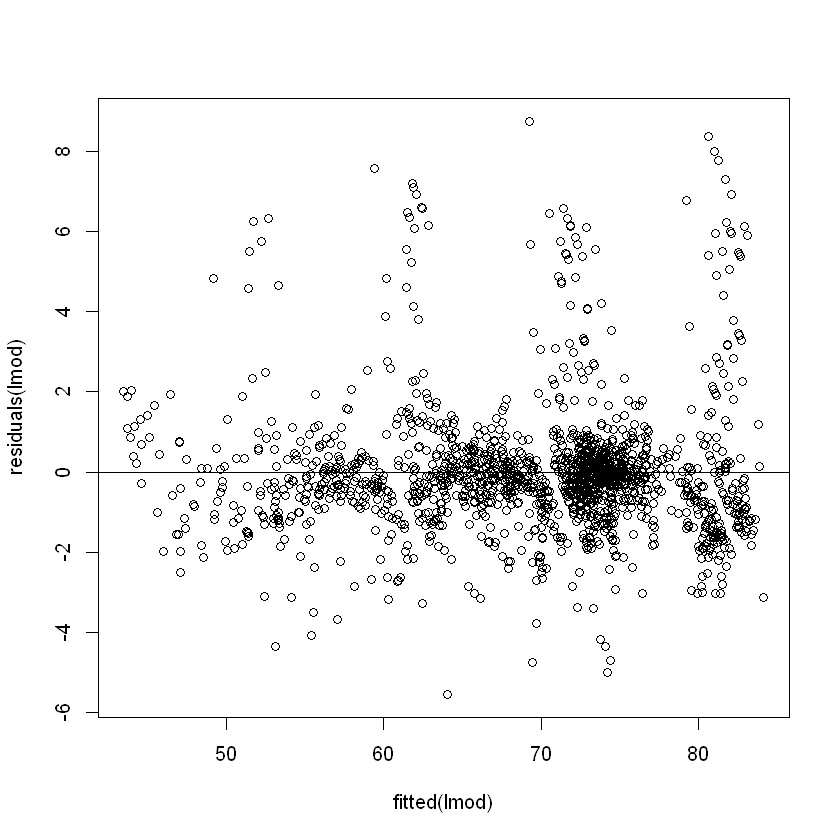

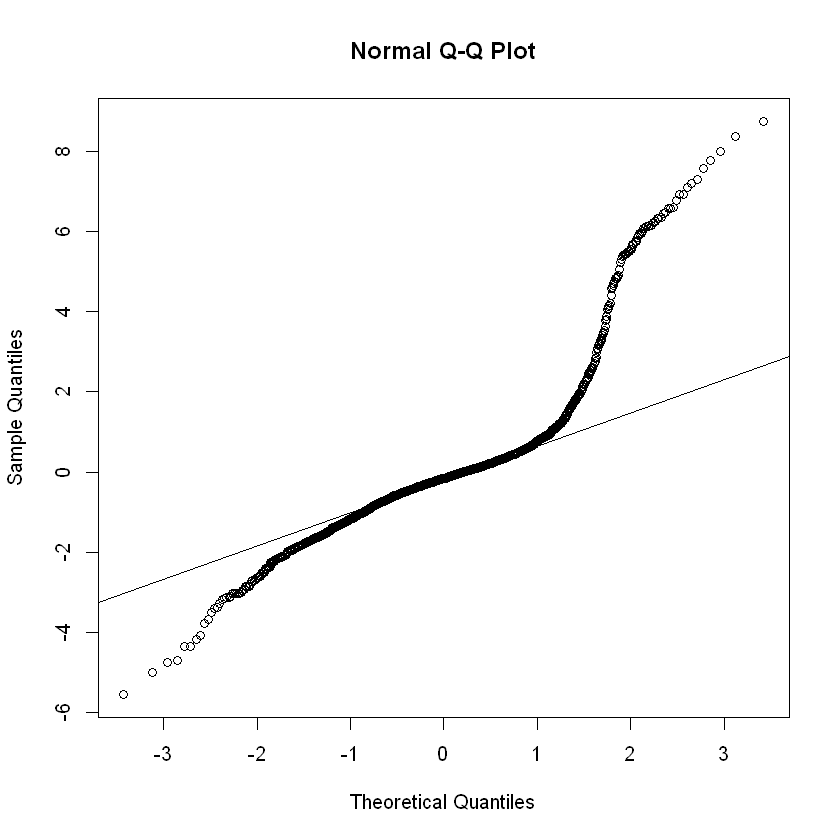

In [2]:
plot(fitted(lmod), residuals(lmod))
abline(h=0)
qqnorm(residuals(lmod))
qqline(residuals(lmod))

In [3]:
lifeData_scaled = read.csv("C:/Code/BIOSTAT682/Life Expectancy_v4.csv")

In [4]:
Asia_Countries <- c("Afghanistan", "Armenia", "Azerbaijan", "Bangladesh", "Bhutan", "Cambodia", "China", "Georgia", "India", "Indonesia", "Kazakhstan", "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "Pakistan", "Philippines", "Sri Lanka", "Tajikistan", "Thailand", "Timor-Leste", "Turkey","Turkmenistan", "Uzbekistan")
EuroNA_Countries <- c("Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Canada", "Croatia", "Cyprus", "Estonia", "France", "Germany", "Greece", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "Montenegro", "Netherlands", "Poland", "Portugal", "Romania", "Russian Federation", "Serbia", "Spain", "Sweden", "Ukraine")
Africa_Countries <- c("Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Djibouti", "Eritrea", "Ethiopia", "Gabon", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho", "Liberia", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "South Africa", "Swaziland", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe")
LatinAmerica_Countries <- c("Argentina", "Belize", "Brazil", "Chile", "Colombia", "Costa Rica", "Dominican Republic", "Ecuador", "El Salvador", "Guatemala", "Guyana", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Paraguay", "Peru", "Suriname", "Uruguay")
MiddleEast_Countries <- c("Iraq", "Israel", "Jordan", "Lebanon", "Syrian Arab Republic")
Oceania_Countries <- c("Australia", "Fiji","Kiribati", "Papua New Guinea", "Samoa", "Solomon Islands", "Tonga", "Trinidad and Tobago", "Vanuatu")

In [12]:
lifeData_continent <- lifeData_scaled
lifeData_continent$Continent <- rep(NA, nrow(lifeData_continent))
for(i in 1:nrow(lifeData_continent)) {
    if (lifeData_continent[i,]$Country %in% Asia_Countries) {
        lifeData_continent[i,]$Continent <- "Asia"
    } else if (lifeData_continent[i,]$Country %in% EuroNA_Countries) {
        lifeData_continent[i,]$Continent <- "Europe or North America"
    } else if (lifeData_continent[i,]$Country %in% Africa_Countries) {
        lifeData_continent[i,]$Continent <- "Africa"
    } else if (lifeData_continent[i,]$Country %in% LatinAmerica_Countries) {
        lifeData_continent[i,]$Continent <- "Latin America"
    } else if (lifeData_continent[i,]$Country %in% MiddleEast_Countries) {
        lifeData_continent[i,]$Continent <- "Middle East"
    } else if (lifeData_continent[i,]$Country %in% Oceania_Countries) {
        lifeData_continent[i,]$Continent <- "Oceania"
    }
}

In [13]:
head(lifeData_continent, 20)

,Country,Year,Status,Life.expectancy,Adult.Mortality,Alcohol,Hepatitis.B,Measles,BMI,Polio,Total.expenditure,Diphtheria,HIV.AIDS,GDP,Population,thinness.1.19.years.,Income.composition.of.resources,Schooling,Continent
,<chr>,<int>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,2015,Developing,65.0,263,0.01,65,1154,19.1,6,8.16,65,0.1,0.005842592,33736494,17.2,0.479,10.1,Asia
2,Afghanistan,2014,Developing,59.9,271,0.01,62,492,18.6,58,8.18,62,0.1,0.006126965,32758200,17.5,0.476,10.0,Asia
3,Afghanistan,2013,Developing,59.9,268,0.01,64,430,18.1,62,8.13,64,0.1,0.006317450,31731688,17.7,0.470,9.9,Asia
4,Afghanistan,2012,Developing,59.5,272,0.01,67,2787,17.6,67,8.52,67,0.1,0.006699590,36969580,17.9,0.463,9.8,Asia
5,Afghanistan,2011,Developing,59.2,275,0.01,68,3013,17.2,68,7.87,68,0.1,0.006353723,29785990,18.2,0.454,9.5,Asia
6,Afghanistan,2010,Developing,58.8,279,0.01,66,1989,16.7,66,9.20,66,0.1,0.005533289,28831670,18.4,0.448,9.2,Asia
7,Afghanistan,2009,Developing,58.6,281,0.01,63,2861,16.2,63,9.42,63,0.1,0.004458933,28433100,18.6,0.434,8.9,Asia
8,Afghanistan,2008,Developing,58.1,287,0.03,64,1599,15.7,64,8.33,64,0.1,0.003733611,27294310,18.8,0.433,8.7,Asia
9,Afghanistan,2007,Developing,57.5,295,0.02,63,1141,15.2,63,6.73,63,0.1,0.003698358,26616792,19.0,0.415,8.4,Asia


In [15]:
write.csv(lifeData_continent,"C:/Code/BIOSTAT682/Life Expectancy_v5.csv", row.names = FALSE)